# COSC2902 Assignment 1: 

Unikey: smcm7233, mile3901

SID: 480379414, 480133780

## Question 1: Zombie Simulation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import scipy.integrate as integrate

In [40]:
class Person:
    def __init__(self, x, y, zombie = False):
        self.zombie = zombie
        self.x = x
        self.y = y
        

In [41]:
class World:
    def __init__(self, sidelength = 40, maxtime = 1000, pop = 100, remission = 0):
        self.sidelength = sidelength
        self.remission = remission
        self.maxtime = maxtime
        self.pop = pop
        self.people = [Person(np.random.randint(0,sidelength),np.random.randint(0,sidelength)) for i in range(self.pop)]
        self.time = 0
        
    def set_zombies(self, num_zoms):
        for i in np.random.choice(self.people, num_zoms, replace=False):
            i.zombie = True
        return np.nan
    
    def get_zombies(self):
        return [i for i in self.people if i.zombie == True]
    
    def get_people(self):
        return [i for i in self.people if i.zombie == False]
    
    def get_time(self):
        return self.time  

    def zombie_pos(self):
        tups = [[i.x,i.y] for i in self.people if i.zombie == True]
        return tups
        
    def people_pos(self):
        tups = [[i.x,i.y] for i in self.people if i.zombie == False]
        return tups
    
    def move_step(self):
        for i in self.people:
            new_x_pos = i.x + np.random.choice([-1,0,1])
            new_y_pos = i.y + np.random.choice([-1,0,1])

            if new_x_pos == self.sidelength:
                i.x = 0
            elif new_x_pos == -1:
                i.x = self.sidelength-1
            else:
                i.x = new_x_pos

            if new_y_pos == self.sidelength:
                i.y = 0
            elif new_y_pos == -1:
                i.y = self.sidelength-1
            else:
                i.y = new_y_pos
                
        self.time += 1

    def infect(self):
        for i in self.people:
            if [int(i.x),int(i.y)] in [[int(j.x),int(j.y)] for j in self.get_zombies()]:
                i.zombie = True 

        return np.nan
    
    def restore(self):
        for i in [j for j in self.people if j.zombie == True]:
            change = np.random.choice([1,0], p = [self.remission, 1-self.remission])
            if change == 1:
                i.zombie = False
        return np.nan
    
            

1


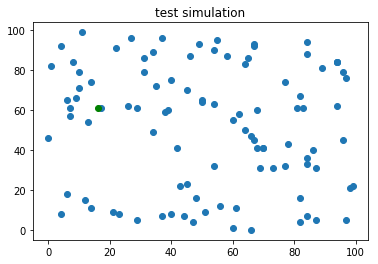

In [48]:
test = World(sidelength = 100)
test.set_zombies(1)
peop_x,peop_y = zip(*test.people_pos())
plt.scatter(peop_x, peop_y, label = 'People')
zom_x,zom_y = zip(*test.zombie_pos())
plt.scatter(zom_x,zom_y, label = 'Zombies', c = 'g')
plt.title('test simulation')
#plt.legend(loc = 'centre')
print(len(test.get_zombies()))

Text(0.5, 1.0, 'Test continued: T = 1900, Num. Zombies = 96')

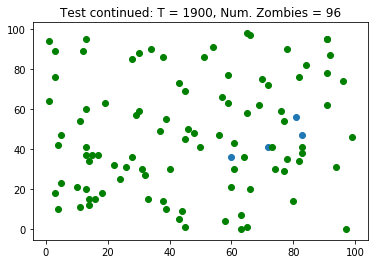

In [67]:
for i in range(100):
    test.move_step()
    test.infect()
    test.restore()
    
peop_x,peop_y = zip(*test.people_pos())
plt.scatter(peop_x, peop_y, label = 'People')
zom_x,zom_y = zip(*test.zombie_pos())
plt.scatter(zom_x,zom_y, label = 'Zombies', c = 'g')
#plt.legend(loc = 'centre')
plt.title("Test continued: T = {}, Num. Zombies = {}".format(test.get_time(), len(test.get_zombies())))

# Add condition for all people or all zombies here

In [6]:
def run_sim_to_end(world_object):
    
    num_zombies_time = [0]
    
    while len(world_object.get_people()) != 0 and len(world_object.get_zombies()) != 0 and world_object.time <1000:
        #print(len(world_object.get_zombies()),"'\'")
        world_object.move_step()
        world_object.infect()
        world_object.restore()
        num_zombies_time.append(len(world_object.get_zombies()))
        
    if world_object.time == 1000:
        print('An equillibrium has likely been reached.')

    return world_object.get_time(), num_zombies_time


def run_sim(world_object, days=100):
    for i in range(days):
        world_object.move_step()
        world_object.infect()
        world_object.restore()


In [7]:
def plot_world(world_object):
    
    if len(world_object.get_people()) == 0:
        zom_x,zom_y = zip(*world_object.zombie_pos())
        plt.scatter(zom_x,zom_y, label = 'Zombies', c= 'g')
        #plt.legend(loc = 'centre')
        plt.title("T = {}, Num. Zombies = {}".format(world_object.get_time(), len(world_object.get_zombies())))
    
    elif len(world_object.get_zombies()) == 0:
        peop_x,peop_y = zip(*world_object.people_pos())
        plt.scatter(peop_x, peop_y, label = 'People', c = 'b')    
        plt.title("T = {}, Num. Zombies = {}".format(world_object.get_time(), len(world_object.get_zombies())))
        
    else:
        peop_x,peop_y = zip(*world_object.people_pos())
        plt.scatter(peop_x, peop_y, label = 'People', c = 'b')
        zom_x,zom_y = zip(*world_object.zombie_pos())
        plt.scatter(zom_x,zom_y, label = 'Zombies', c= 'g')
        #plt.legend(loc = 'centre')
        plt.title("T = {}, Num. Zombies = {}".format(world_object.get_time(), len(world_object.get_zombies())))

function test.


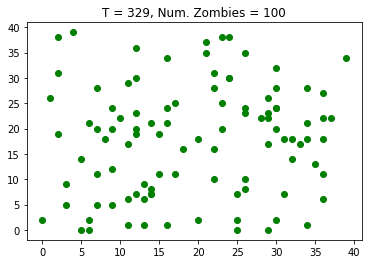

In [8]:
earth = World(remission=0)
earth.set_zombies(1)
t,z = run_sim_to_end(earth)
plot_world(earth)
print('function test.')

## Question 1

**(1.1)** What is the average length of time until the last human gets infected? Provide also an estimate
of the uncertainty in your value.

In [9]:
full_infection_times = []
zombie_nums = []

#t1 = time.localtime()
for i in range(10):
    earth = World(sidelength=40)
    earth.set_zombies(10)
    t, zombies = run_sim_to_end(earth)
    full_infection_times.append(t)
    zombie_nums.append(zombies)

#t2 = time.localtime()    

print('Average full infection time =', np.mean(full_infection_times))
#print(t1)
#print(t2)



Average full infection time = 183.2


In [10]:
uncertainty = (np.max(full_infection_times)-np.min(full_infection_times))/(2*np.sqrt(len(full_infection_times)))
print(np.mean(full_infection_times), '+/-',uncertainty)

183.2 +/- 13.281566172707192


**(1.2)** Averaging over many runs: Plot the number of zombies as a function of time.

In [11]:
#for 100 runs plot ave num zombes at time t
full_infection_times = []
zombie_nums = []

#t1 = time.localtime()
for i in range(10):
    earth = World(sidelength=40)
    earth.set_zombies(1)
    t, zoms = run_sim_to_end(earth)
    full_infection_times.append(t)
    zombie_nums.append(zoms)

#t2 = time.localtime()    

Text(0.5, 1.0, 'Average Zombies over time')

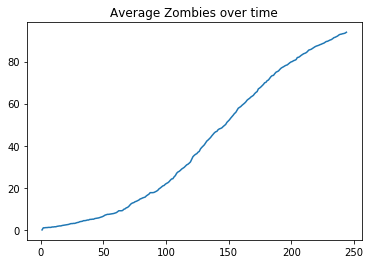

In [12]:
aves = [np.mean(i) for i in zip(*zombie_nums)]
time = np.linspace(1,len(aves)+1, len(aves))

plt.plot(time, aves)
plt.title('Average Zombies over time')

**(1.3)** Averaging over many runs: Plot the number of infections per day (the infection rate) as a function of the fraction of zombies in the population.

In [13]:
#difference function that returns difference
def diff(ls):
    diffs = [ls[i+1] - ls[i] for i in range(len(ls)-1)]
    return diffs

Text(0.5, 1.0, 'Average Change in Zombies over time')

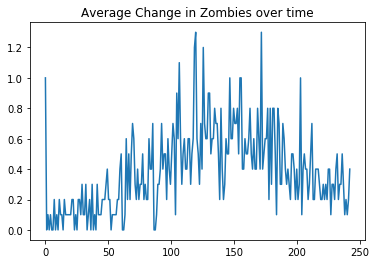

In [14]:
deltas = diff(aves)
time = np.linspace(0,len(deltas), len(deltas))
plt.plot(time, deltas)
plt.title('Average Change in Zombies over time')

Text(0.5, 1.0, 'Average Change in Zombies vs fraction of zombies')

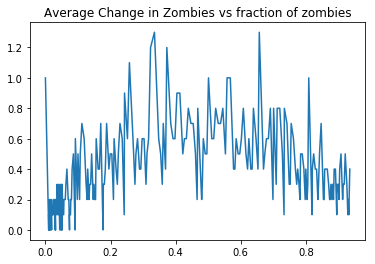

In [15]:
deltas = diff(aves)
plt.plot(np.array(aves[:-1])/100, deltas)
plt.title('Average Change in Zombies vs fraction of zombies')

The trend appears to be negative parabola. Which makes sense. Since i is the first derivative of a cubic.

**(1.4)** Given your results in (1.3), postulate a discrete map for the zombie fraction (Z), i.e. Z n+1 = f (Z n , t n ).

The turning point of the infection rate is approximately n=0.5. This is the point at which half of the population is zombies and half are people. We infer from the plot that the infection rate is a parabola. From this infer that the potential discrete map is:

Z(n+1) = Zn - (n - 0.5)^2 + 0.8

Where n is the percentage of zombies. i.e. num_zombies/population.


**(1.5)** If you halve the size of the world (i.e., set sidelength=20), how does this change the time it takes until the last human is infected? Briefly discuss the real-world implications of this result, e.g. in terms of how diseases such as tuberculosis spread in crowded hospitals and prisons.

In [16]:
full_infection_times = []
zombie_nums = []

for i in range(10):
    earth = World(sidelength=20)
    earth.set_zombies(1)
    t, zoms = run_sim_to_end(earth)
    full_infection_times.append(t)
    zombie_nums.append(zoms)
    
aves = [np.mean(i) for i in zip(*zombie_nums)]
time = np.linspace(1,len(aves)+1, len(aves))


Average days is 61


Text(0.5, 1.0, 'Average Zombies over time (World size = 20)')

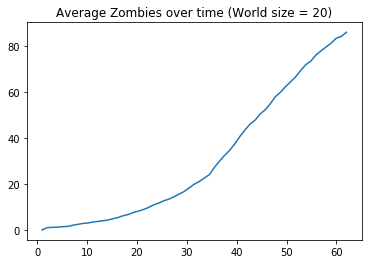

In [17]:
print("Average days is", len(aves))
plt.plot(time, aves)
plt.title('Average Zombies over time (World size = 20)')

#### Discussion of Real-World Implications:

After running the simulation with a smaller world size, it is clear that the infection spreads much faster than on a larger map. We believe that this trend also exists in confined spaces, such as hospital wards or ships, leading to faster spread of disease. Thus, to slow down infection, one solution would be to spread out the people as much as possible in these environments.

**(1.6)** Using the original size of the world (sidelength=40), change the spontaneous zombie remission rate from 0 to 0.01 (i.e., every 100 days on average a given zombie will spontaneously return to being human). Discuss the new dynamics of the model, with reference to steady states and/or equilibrium points (if you wish, you can also include a graph of the number of zombies over time to illustrate your point). Be careful to identify all possible types of behaviour (a “type” being a qualitatively distinct behaviour).

An equillibrium has likely been reached.


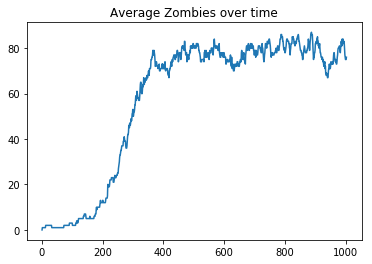

In [18]:
full_infection_times = []
zombie_nums = []

#t1 = time.localtime()
for i in range(1):
    earth = World(sidelength=40, remission=0.01)
    earth.set_zombies(1)
    t, zoms = run_sim_to_end(earth)
    full_infection_times.append(t)
    zombie_nums.append(zoms)
    
aves = [np.mean(i) for i in zip(*zombie_nums)]
time = np.linspace(1,len(aves)+1, len(aves))

plt.plot(time, aves)
plt.title('Average Zombies over time')
plt.show()


With the inclusion of zombie remission, several scenarios appear due to the uncertainty of restoration (every 100 days). Four possible types of behaviour can occur.

Types of Behaviour:
- The initial zombie is cured before it infects anyone. The graph drops from 1 to zero.
- Initially the zombie number increases but drops to zero.
- The most often case is where the zombie number increases quickly to ~80 and then oscillates in the range [65,85]. This is an equillibrium between infection and remission.
- Or finally, the zombie number increases and all are infected.

## Question 2: Bus Wait Times

In [24]:
class passenger:
    def __init__(self):
        self.arrival_time = np.nan
        self.wait_time = np.nan   

In [25]:
def diff(ls):
    diffs = [ls[i+1] - ls[i] for i in range(len(ls)-1)]
    return diffs

**(2.1)**

### Model 1

Ave bus arrival time 10.030150753768844
Ave passenger wait time 9.246666666666666
Nature of model is negative exponential


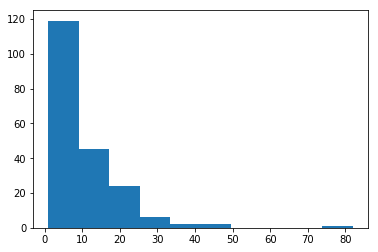

In [26]:
buses = 200
passengers = np.random.choice(range(5,11))*buses
run_time = 10*buses
bus_times = np.sort(np.append(np.random.choice(range(run_time), buses-1, replace = False),run_time))
passenger_list = [passenger() for i in range(passengers)]
for i in passenger_list:
    i.arrival_time = np.random.choice(range(run_time))
    s = bus_times - np.ones(len(bus_times))*i.arrival_time
    t = np.where(s > -1)
    i.wait_time = s[t][0]
    
bus_intervals = diff(bus_times)
print('Ave bus arrival time', np.mean(bus_intervals))
print('Ave passenger wait time', np.mean([i.wait_time for i in passenger_list]))
plt.hist(bus_intervals)
print('Nature of distribution is negative exponential')

### Model 2

Ave bus arrival time 10.004067169689685
Ave passenger wait time 5.002483486410301
Nature of model is triangle like i.e. with tails too fat for a normal distribution. With an average of approximately 10.


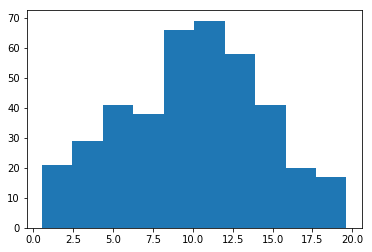

In [22]:
x = 5
buses = 400
passengers = np.random.choice(range(5,11))*buses
run_time = 10*buses
schedule_time = np.linspace(0,run_time, buses+1)
offset_time_1 = [np.random.uniform(-x,x) for i in range(len(schedule_time))]
actual_time = schedule_time + offset_time_1

passenger_list = [passenger() for i in range(passengers)]
for i in passenger_list:
    i.arrival_time = np.random.choice(range(run_time))
    s = actual_time - np.ones(len(actual_time))*i.arrival_time
    t = np.where(s > -1)
    i.wait_time = s[t][0]
    
bus_intervals = diff(actual_time)

print('Ave bus arrival time', np.mean(bus_intervals))
print('Ave passenger wait time', np.mean([i.wait_time for i in passenger_list]))
plt.hist(bus_intervals)
print('Nature of model is triangle like i.e. with tails too fat for a normal distribution. With an average of approximately 10.')

### Model 3

Ave bus arrival time 10.002432595259
Ave passenger wait time 5.519516769815899
Nature of model is normal. With an average of approximately 10.


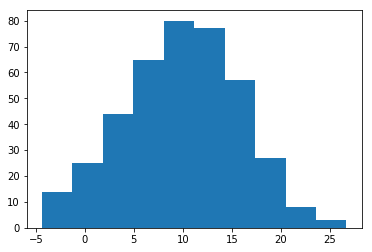

In [27]:
sigma = 4
buses = 400
passengers = np.random.choice(range(5,11))*buses
run_time = 10*buses
schedule_time = np.linspace(0,run_time, buses+1)
offset_time_2 = [np.random.normal(0,sigma) for i in range(len(schedule_time))]
actual_time = schedule_time + offset_time_2

passenger_list = [passenger() for i in range(passengers)]
for i in passenger_list:
    i.arrival_time = np.random.choice(range(run_time))
    s = actual_time - np.ones(len(actual_time))*i.arrival_time
    t = np.where(s > -1)
    i.wait_time = s[t][0]
    
bus_intervals = diff(actual_time)

print('Ave bus arrival time', np.mean(bus_intervals))
print('Ave passenger wait time', np.mean([i.wait_time for i in passenger_list]))
plt.hist(bus_intervals)
print('Nature of model is normal. With an average of approximately 10.')

**(2.2)**

Model 2 - 
 - Ave wait time: As x increases the average wait time increases.
 - Distribution: as x increases the range of the ditribtion is +/- 2x. The shape of the distribution is normal.


Model 3 - 
 - Ave wait time: As σ increases the average wait time increases.
 - Distribution: Normal in all cases. The range of the distribution increases as σ increases

**(2.3)**

i)

In [3]:
route_1 = pd.read_csv('Route_1_minutes_late.csv', header= None)
route_2 = pd.read_csv('Route_2_minutes_late.csv', header=None)

Average offset for route 1: 0.4127970284434953


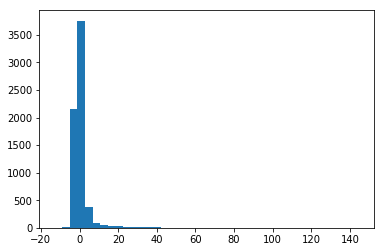

In [4]:
plt.hist(route_1[0], bins = 40)
print('Average offset for route 1:',np.mean(route_1[0]))

Average offset for route 2: 2.412317954985238
2.412317954985238
0    0.183333
1    4.116667
2   -0.100000
3    4.383333
4    3.850000
Name: 0, dtype: float64


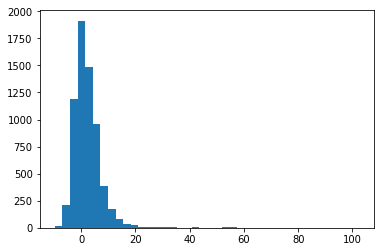

In [5]:
plt.hist(route_2[0], bins = 40)
print('Average offset for route 2:', np.mean(route_2[0]))
print(np.mean(route_2[0]))
print(route_2[0].head())

ii)

Since the first model does not have bus time schedule we cnnot compare the lateness/earliness of the buses. However, for model 2 and 3 we can.

Here is the schedule offset histogram for model 2:

Average offset for model 2: 0.03178003830164079


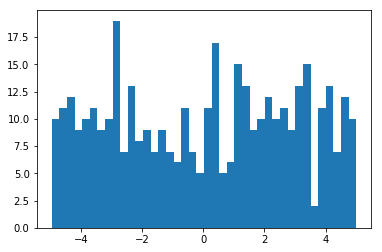

In [33]:
plt.hist(offset_time_1, bins = 40)
print('Average offset for model 2:',np.mean(offset_time_1))
plt.show()

As determined by the nature of the model, each bus is early/late based on a uniform distribution which is what we observe here.

Here is the schedule offset histogram for model 3:

Average offset for model 3: 0.03149408143646739


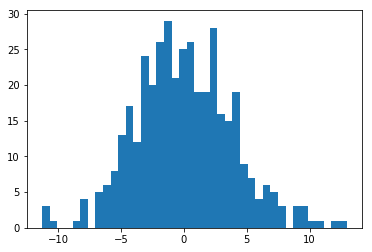

In [34]:
plt.hist(offset_time_2, bins = 40)

print('Average offset for model 3:', np.mean(offset_time_2))
plt.show()

We observe in the offset histogram from model 3 that it follows a normal distribution as instructed. This is also what we observe from both of the real life datasets. Thus, model 3 appears to be the best fit for the given data.

**(2.4)**

From model 1 the average wait time is roughly 9.5, however for both model 2 and 3 average wait times are in fact roughly five minutes. This is average is reported above for each model. Furthermore, the offset time is similar to that of model 3, which implies a similar wait time. Thus, an average wait time of 5 minutes is to be expected for models 2 and 3 and the real world data.

## Question 3: Monte Carlo Integration

Our function

In [6]:
def func(x):
    return x**3*np.sin(x)+x**2+50

(3.1) Numerical method of Monte Carlo integration

In [7]:
def integratemonte(N,a,b):
    x = np.random.uniform(a,b,N)
    result = np.mean(func(x))
    
    return (b-a)*result

(3.2) Using your function, calculate the integral

The result of the Monte Carlo integration for 50 number of points between 0 and 5 

In [11]:
num_result = integratemonte(50,0,5)
print(num_result)

201.01460654859255


This is the analytical solution(left) and standard error (right) using the scipy.integrate module.

In [9]:
result2 = integrate.quad(func,0,5)
print(result2)

(198.5529840959036, 2.6301143952488766e-12)


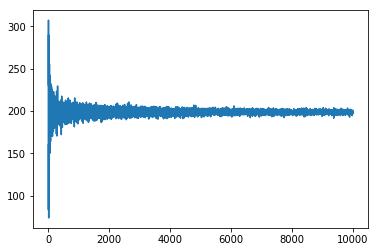

In [41]:
n = np.arange(1,10**4)
result = np.zeros(len(n))

for i in range(len(n)):
    result[i] = integratemonte(n[i],0,5)
    
plt.plot(n,result)
plt.xlabel("Number of Points")
plt.ylabel("Integration Result")
plt.show()

(3.3) The error term for Monte Carlo integration

Function for the standard error using the given formula

In [7]:
def error(N,a,b):
    x = np.linspace(a,b,num=N)
    
    f1 = np.sum(func(x)**2)/N
    f2 = (np.sum(func(x))/N)**2
    
    result = (b-a)*np.sqrt((f1-f2)/N)
    
    return result

Calculating the standard error for number of points from 1 to 10,000

In [8]:
N = np.arange(1,10**4+1)
result = np.zeros(len(N))

for i in range(len(N)):
    result[i] = error(N[i],0,5)



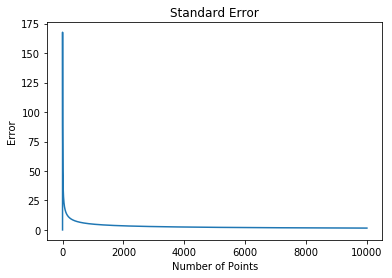

In [9]:
plt.plot(N,result)
plt.xlabel("Number of Points")
plt.ylabel("Error")
plt.title("Standard Error")
plt.show()

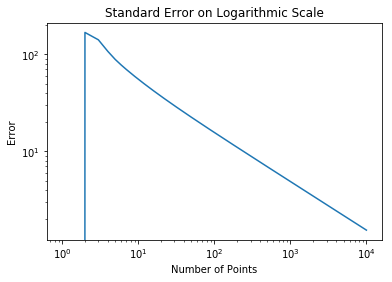

In [10]:
plt.loglog(N,result)
plt.xlabel("Number of Points")
plt.ylabel("Error")
plt.title("Standard Error on Logarithmic Scale")
plt.show()

Clearly we could say that as the number of points increases, the standard error decreases exponentially. To find the number of points needed for one decimal place of accurate intergration, we need our standard deviation to be around 0.05 so that rounding the result would give us the exact solution.

Therefore we must find the slope of the line in the logarithmic plot. Knowing the slope and the value of y (0.05), we can find the value of x which is the number of points required for one decimal accuracy. Finding the slope would give us the line that fit on the logarithmic plot, and with that equation we could find the value of x.

Equation of line is y = mx+b where m is the slope.

In [12]:
log_result = np.log(result)
log_n = np.log(N)

slope = np.polyfit(log_n[-50:],log_result[-50:],1)[0]

#Choose a point on the line

y =log_result[-100]
x =log_n[-100]

b = y-x*slope

y_result = 0.05

x_result = (y_result-b)/slope

#Since x_result is on a logarithmic scale the actual solution is
print(x_result)

#solution = 10**x_result

9.984572447823496


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


Our final estimate for precision to one decimal place is 10^9.845 points.

(3.4) Briefly discuss (with examples) an advantage and disadvantage of Monte Carlo integration as compared to a traditional technique such as the trapezoidal rule.

Since Monte Carlo integration uses random values, the final result is an approximation of the true value. Therefore one of the disadvantages for this method is that it requires the law of large numbers to reduce the standard error (that is why we need to use logarithmic scale for both axes). In other words, a large number of points is required for accurate values. In contrast, the methodical nature of using the trapezoidal rule allows us to gradually and more predictably approach the true integral value.

However, the randomness of Monte Carlo integration also provides an advantage. Since it uses random numbers, we could observe that the output of our function varies if we call it multiple times even though we use the same arguments. It could give as the same precision of integration result with lower number of points compared to other methods that are heavily rely on large number of slices. Therefore, in some cases the amount of work to calculate the precise integral is less when compared with other methods such as the trapezoidal rule, where many slices must be calculated to provide accurate results.


